# **1. Import Libraries**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors



# **2. Import Dataset**

In [30]:
# Load Spotify dataset
df = pd.read_csv("SpotifyFeatures.csv")

# Display first 5 rows
print(df.head())

# Optional: show dataset info
print(df.info())



   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

# **3. EDA**

In [31]:
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [32]:
df.tail(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489
232724,Soul,Mint Condition,You Don't Have To Hurt No More,34XO9RwPMKjbvRry54QzWn,35,0.09730,0.758,323027,0.470,0.000049,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479


In [33]:
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
132121,Reggae,HIRIE,Melody Of A Broken Heart,2h50Uv4tmcFsqszkhczvpD,35,0.38500,0.731,367760,0.527,0.00784,D,0.1020,-10.105,Major,0.0931,129.837,4/4,0.547
174342,Comedy,Felipe Esparza,My Best Friend,4D5EUSh5Op9lyZkrKs6RgN,14,0.84300,0.514,102836,0.185,0.00000,B,0.6670,-22.887,Major,0.8890,89.115,4/4,0.545
159967,Reggaeton,"Tito ""El Bambino""",Mata,2PwHp9ycKgmBmAlw6F9klF,50,0.33300,0.796,178520,0.827,0.00000,B,0.4180,-5.721,Minor,0.1150,95.016,4/4,0.850
47127,Blues,The Marcus King Band,8 a.m.,5eJFAbft07gwW1lyctwbtc,37,0.00116,0.423,218920,0.570,0.00220,G,0.3310,-7.958,Major,0.0292,139.345,3/4,0.341
32407,Anime,Aun J-Classic Orchestra,SAVANNAH,38sY0cFcXehglzGlVPmHpl,17,0.61700,0.596,385154,0.596,0.76100,A,0.0776,-8.779,Minor,0.0575,129.891,4/4,0.367


In [34]:
df.shape


(232725, 18)

In [35]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [36]:
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [37]:
df = df.dropna(subset=['track_name'])


In [38]:
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [39]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232724 non-null  object 
 1   artist_name       232724 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232724 non-null  object 
 4   popularity        232724 non-null  int64  
 5   acousticness      232724 non-null  float64
 6   danceability      232724 non-null  float64
 7   duration_ms       232724 non-null  int64  
 8   energy            232724 non-null  float64
 9   instrumentalness  232724 non-null  float64
 10  key               232724 non-null  object 
 11  liveness          232724 non-null  float64
 12  loudness          232724 non-null  float64
 13  mode              232724 non-null  object 
 14  speechiness       232724 non-null  float64
 15  tempo             232724 non-null  float64
 16  time_signature    232724 

# **4. Data Cleaning**

In [41]:
# Remove duplicate rows
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (232724, 18)


In [42]:
# Check for outliers in numerical columns
numerical_cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 
                 'energy', 'instrumentalness', 'liveness', 'loudness', 
                 'speechiness', 'tempo', 'valence']

df[numerical_cols].describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232724.000000,232724.000000,232724.000000,2.327240e+05,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000,232724.000000
mean,41.127490,0.368562,0.554366,2.351218e+05,0.570958,0.148302,0.215010,-9.569896,0.120765,117.666494,0.454919
std,18.189986,0.354768,0.185608,1.189359e+05,0.263456,0.302769,0.198273,5.998215,0.185519,30.898942,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828562e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.777500,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054500,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


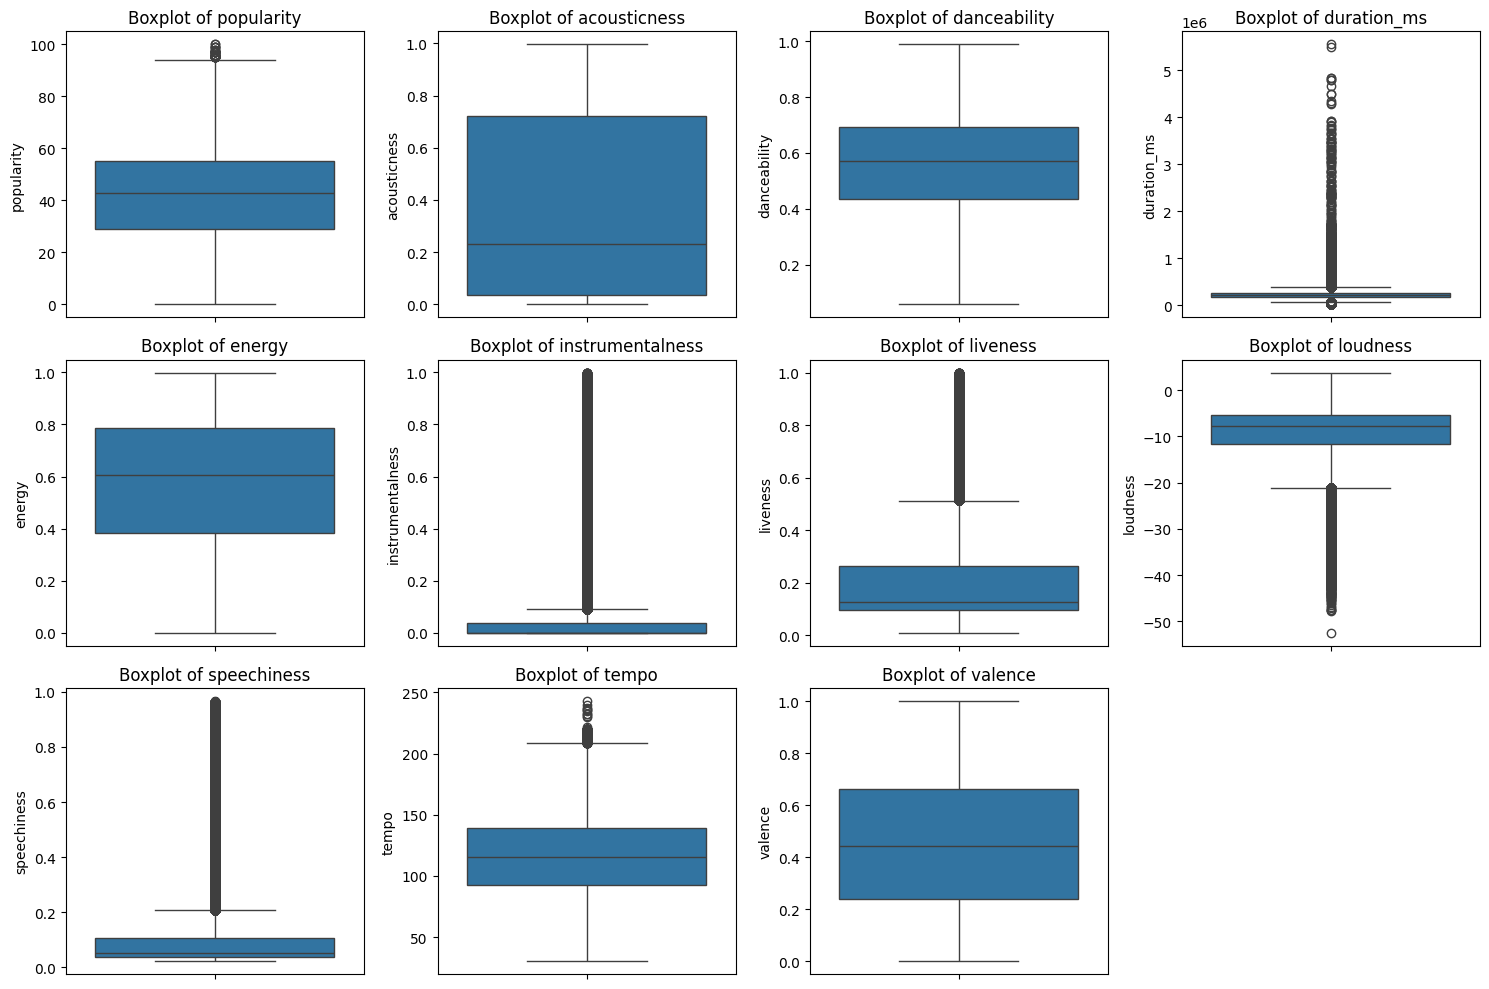

In [43]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [44]:
# Handle duration_ms - convert to minutes and remove extreme values
df['duration_min'] = df['duration_ms'] / 60000

# Remove songs that are too short (< 30 seconds) or too long (> 15 minutes)
df = df[(df['duration_min'] >= 0.5) & (df['duration_min'] <= 15)]
print("Shape after filtering duration:", df.shape)

Shape after filtering duration: (231948, 19)


In [45]:
# Remove songs with tempo = 0 (invalid data)
df = df[df['tempo'] > 0]
print("Shape after removing zero tempo:", df.shape)

Shape after removing zero tempo: (231948, 19)


In [46]:
# Reset index after cleaning
df = df.reset_index(drop=True)
print("Final dataset shape:", df.shape)

Final dataset shape: (231948, 19)


# **5. Complete Code Implementation**

In [47]:
# Define user profiles and genre mappings
genre_context_mapping = {
    'focus_study': ['Classical', 'Ambient', 'Jazz', 'Acoustic', 'Piano', 'Lo-fi', 'New Age'],
    'workout_gym': ['Hip-Hop', 'Electronic', 'Dance', 'Rock', 'Pop', 'Metal', 'EDM'],
    'relaxation': ['Ambient', 'New Age', 'Acoustic', 'Classical', 'Soul', 'Folk', 'Jazz'],
    'party_social': ['Dance', 'Electronic', 'Hip-Hop', 'Pop', 'Reggae', 'Funk', 'Disco'],
    'romantic': ['R&B', 'Soul', 'Pop', 'Jazz', 'Acoustic', 'Classical', 'Ballad'],
    'commute_travel': ['Pop', 'Rock', 'Indie', 'Hip-Hop', 'Electronic', 'Alternative', 'Folk']
}

user_profiles = {
    'student': 'focus_study',
    'businessman': 'focus_study', 
    'gym_guy': 'workout_gym',
    'party_host': 'party_social',
    'romantic_date': 'romantic',
    'traveler': 'commute_travel',
    'relaxation_seeker': 'relaxation'
}

# **6. Search Function**

In [48]:
def search_songs(query, max_results=15):
    """Search songs by track name with auto-complete functionality"""
    if len(query) < 2:
        return pd.DataFrame()
    
    mask = df['track_name'].str.lower().str.contains(query.lower(), na=False)
    results = df[mask][['track_name', 'artist_name', 'genre', 'popularity']].head(max_results)
    return results

# **7. Build ML Model**

In [49]:

# Select audio features for similarity
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

print("🎵 Building ML model with features:", audio_features)

# Create and scale feature matrix
X = df[audio_features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build KNN model
knn_model = NearestNeighbors(n_neighbors=50, metric='cosine', algorithm='brute')
knn_model.fit(X_scaled)

print("✅ ML model trained successfully!")

🎵 Building ML model with features: ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
✅ ML model trained successfully!


# **8. Smart Recommendation Function**

In [50]:
# First, let's get all unique genres from your dataset
all_genres = sorted(df['genre'].unique())
print(f"🎵 Available genres: {len(all_genres)}")
print("Sample genres:", all_genres[:10])  # Show first 10
def search_by_artist(artist_name):
    """
    Search for songs by artist name and display results for Gradio.
    """
    results = df[df['artist_name'].str.lower().str.contains(artist_name.lower(), na=False)]

    if results.empty:
        return f"No songs found for artist: {artist_name}"
    
    # Show only useful info
    return results[['artist_name', 'track_name', 'genre', 'popularity']].head(10)


def enhanced_recommendation_system(song_query, user_profile, selected_genre, n_recommendations=10):
    """
    Enhanced system with genre selection
    """
    # Search for songs
    search_results = search_songs(song_query, max_results=10)
    
    if len(search_results) == 0:
        return "❌ No songs found. Please try different keywords."
    
    # Use the best match
    best_match = search_results.iloc[0]
    song_name = best_match['track_name']
    
    try:
        # Find the song
        mask = df['track_name'].str.lower() == song_name.lower()
        song_indices = df[mask].index
        
        if len(song_indices) == 0:
            return f"❌ Song '{song_name}' not found."
        
        # Get the song and its features
        song_idx = song_indices[0]
        original_song = df.iloc[song_idx]
        song_features = X_scaled[song_idx].reshape(1, -1)
        
        # Find similar songs
        distances, indices = knn_model.kneighbors(song_features, n_neighbors=50)
        
        # Create recommendations
        recommendations = df.iloc[indices[0]][['track_name', 'artist_name', 'genre', 'popularity']].copy()
        recommendations['similarity_score'] = 1 - distances[0]
        
        # Remove original song
        recommendations = recommendations[recommendations['track_name'] != original_song['track_name']]
        
        # Apply genre filtering if specified
        if selected_genre != "Any Genre" and selected_genre in all_genres:
            recommendations = recommendations[recommendations['genre'] == selected_genre]
            genre_note = f"🎵 Filtered by genre: {selected_genre}"
        else:
            genre_note = "🎵 All genres"
        
        # Apply user profile filtering if specified
        if user_profile != "None" and user_profile in user_profiles:
            context = user_profiles[user_profile]
            preferred_genres = genre_context_mapping[context]
            
            # Filter by preferred genres
            filtered = recommendations[recommendations['genre'].isin(preferred_genres)]
            
            if len(filtered) >= n_recommendations:
                final_recommendations = filtered.head(n_recommendations)
                profile_note = f"👤 Profile: {user_profile}"
            else:
                final_recommendations = pd.concat([
                    filtered,
                    recommendations[~recommendations['genre'].isin(preferred_genres)]
                ]).head(n_recommendations)
                profile_note = f"👤 Mixed for {user_profile}"
        else:
            final_recommendations = recommendations.head(n_recommendations)
            profile_note = "👤 General recommendations"
        
        # Check if we have enough recommendations
        if len(final_recommendations) == 0:
            return f"❌ No recommendations found for '{song_name}' with the selected filters. Try different settings."
        
        # Format output
        output = f"🎵 Based on: '{original_song['track_name']}' by {original_song['artist_name']}\n"
        output += f"{profile_note} | {genre_note}\n"
        output += "=" * 70 + "\n\n"
        
        for i, (idx, row) in enumerate(final_recommendations.iterrows(), 1):
            output += f"{i}. {row['track_name']}\n"
            output += f"   👤 {row['artist_name']} | 🎵 {row['genre']}\n"
            output += f"   ⭐ Popularity: {row['popularity']} | 🔍 Similarity: {row['similarity_score']:.3f}\n\n"
        
        # Add search context if multiple matches found
        if len(search_results) > 1:
            search_info = f"🔍 Found {len(search_results)} songs matching '{song_query}'\n"
            search_info += f"🎯 Using: '{song_name}' by {best_match['artist_name']}\n\n"
            return search_info + output
        
        return output
        
    except Exception as e:
        return f"❌ Error: {str(e)}"

🎵 Available genres: 27
Sample genres: ['A Capella', 'Alternative', 'Anime', 'Blues', "Children's Music", 'Children’s Music', 'Classical', 'Comedy', 'Country', 'Dance']


# **9. Complete System Integration**

In [51]:
def complete_recommendation_system(song_query, user_profile, n_recommendations=10):
    """
    Complete system with search and smart recommendations
    """
    # Search for songs
    search_results = search_songs(song_query, max_results=10)
    
    if len(search_results) == 0:
        return "❌ No songs found. Please try different keywords."
    
    # Use the best match
    best_match = search_results.iloc[0]
    song_name = best_match['track_name']
    
    # Get recommendations
    result = smart_recommend(song_name, user_profile, n_recommendations)
    
    # Add search context
    if len(search_results) > 1:
        search_info = f"🔍 Found {len(search_results)} songs matching '{song_query}'\n"
        search_info += f"🎯 Using: '{song_name}' by {best_match['artist_name']}\n\n"
        return search_info + result
    
    return result

# **10. Quick Test**

# **11. Launch Final Gradio Interface**

In [52]:
# Create the enhanced interface with genre selection
iface = gr.Interface(
    fn=enhanced_recommendation_system,
    inputs=[
        gr.Textbox(
            label="🔍 Search Song", 
            placeholder="Type song name (e.g., 'love', 'dance', 'hello')...",
            info="Start typing to search for songs"
        ),
        gr.Dropdown(
            choices=["None", "student", "businessman", "gym_guy", "party_host", "romantic_date", "traveler", "relaxation_seeker"],
            label="👤 User Profile",
            value="None",
            info="Select your context for personalized recommendations"
        ),
        gr.Dropdown(
            choices=["Any Genre"] + all_genres,
            label="🎵 Filter by Genre",
            value="Any Genre",
            info="Choose specific genre or 'Any Genre' for all"
        ),
        gr.Slider(
            5, 20, value=10, 
            label="Number of Recommendations"
        )
    ],
    outputs=gr.Textbox(
        label="🎧 Your Personalized Recommendations", 
        lines=20,
        show_copy_button=True
    ),
    title="🎵 Smart Spotify Song Recommender",
    description="""**Discover your perfect soundtrack!** 
    
• 🔍 **Search** any song by typing
• 👤 **Choose profile** for context-aware recommendations  
• 🎵 **Filter by genre** for specific music styles
• 🎧 **Get personalized** song suggestions

*Perfect for: Studying, Working Out, Parties, Relaxation, etc.*
    """,
    examples=[
        ["love", "student", "Any Genre", 8],
        ["dance", "gym_guy", "Pop", 6],
        ["hello", "romantic_date", "R&B", 10],
        ["rock", "party_host", "Rock", 12]
    ]
)
artist_iface = gr.Interface(
    fn=search_by_artist,
    inputs=gr.Textbox(
        label="🎤 Search by Artist",
        placeholder="Type an artist name (e.g. Taylor Swift, Eminem)..."
    ),
    outputs=gr.Dataframe(label="🎶 Songs by Artist"),
    title="🎤 Spotify Artist Search",
    description="Find songs by artist name from your dataset."
)
with gr.Blocks() as app:
    gr.Markdown("# 🎧 Smart Spotify Music App")
    with gr.Tab("🔍 Song Recommender"):
        iface.render()
    with gr.Tab("🎤 Artist Search"):
        artist_iface.render()




print("🚀 Launching Enhanced Song Recommender with Genre Selection...")
app.launch(share=True, inbrowser=True)

🚀 Launching Enhanced Song Recommender with Genre Selection...
* Running on local URL:  http://127.0.0.1:7866
* Running on public URL: https://73a020e89e42c0a846.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
